## To study/search for
* Agentic AI
  * N8N workfow
* Generative AI
* Personal component analysis (PCA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Study_data.csv')
df.head()

,id,study_hours,score
0,1,3.745401,26.491215
1,2,9.507143,47.485622
2,3,7.319939,46.002581
3,4,5.986585,45.697610
4,5,1.560186,20.801119


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5250 non-null   int64  
 1   study_hours  4988 non-null   float64
 2   score        4988 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 123.2 KB


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df[df['score'].isnull()]

,study_hours,score
19,2.912291,NaN
63,3.567533,NaN
64,2.809345,NaN
68,0.745506,NaN
81,6.232981,NaN
...,...,...
5144,3.548319,NaN
5153,1.232475,NaN
5158,5.511600,NaN
5236,5.192246,NaN


In [ ]:
df.drop(df[df['study_hours'].isnull() & df['score'].isnull()].index, inplace=True)
display(df.head())

,study_hours,score
0,3.745401,26.491215
1,9.507143,47.485622
2,7.319939,46.002581
3,5.986585,45.697610
4,1.560186,20.801119


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 0 to 5249
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  4988 non-null   float64
 1   score        4988 non-null   float64
dtypes: float64(2)
memory usage: 122.9 KB


In [ ]:
df.dropna(inplace=True)

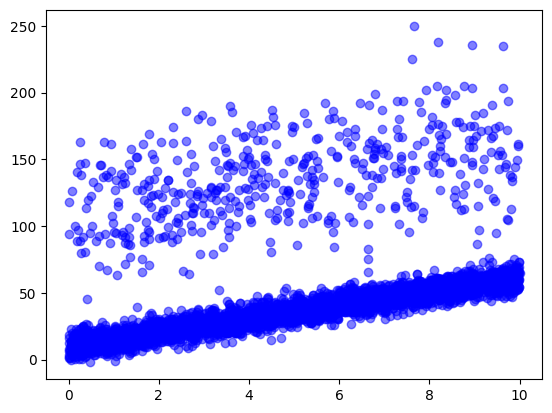

In [ ]:
plt.scatter(df['study_hours'], df['score'], color='blue', alpha=0.5)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4733 entries, 0 to 5249
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  4733 non-null   float64
 1   score        4733 non-null   float64
dtypes: float64(2)
memory usage: 110.9 KB


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index()

,index,study_hours,score
0,0,3.745401,26.491215
1,1,9.507143,47.485622
2,2,7.319939,46.002581
3,3,5.986585,45.697610
4,4,1.560186,20.801119
...,...,...,...
4551,5221,5.230654,32.386147
4552,5223,8.361177,194.147147
4553,5228,2.158210,20.831540
4554,5232,4.303059,30.691431


In [ ]:
Q1_score = df['score'].quantile(0.25)
Q3_score = df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

outlier_mask_score = (df['score'] < lower_bound_score) | (df['score'] > upper_bound_score)

In [ ]:
outlier_mask =outlier_mask_score
df_cleaned = df[~outlier_mask]

print("First few rows of the cleaned DataFrame:")
display(df_cleaned.head())
print("\nShape of the cleaned DataFrame:")
print(df_cleaned.shape)

First few rows of the cleaned DataFrame:


,study_hours,score
0,3.745401,26.491215
1,9.507143,47.485622
2,7.319939,46.002581
3,5.986585,45.697610
4,1.560186,20.801119



Shape of the cleaned DataFrame:
(4147, 2)


**Reasoning**:
Create a scatter plot of 'study_hours' vs 'score' using the cleaned data and add appropriate labels and a title.



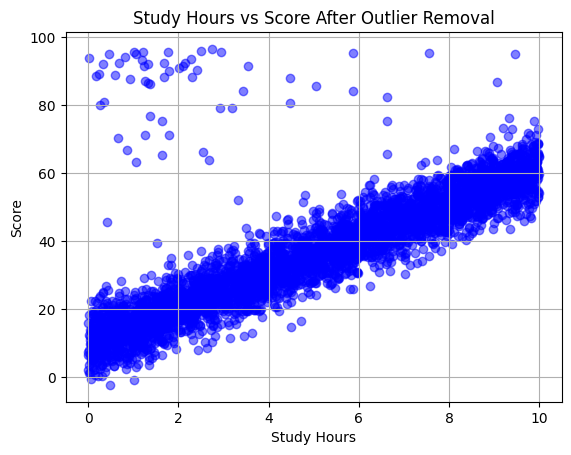

In [ ]:
plt.scatter(df_cleaned['study_hours'], df_cleaned['score'], color = 'blue', alpha=0.5)
plt.title('Study Hours vs Score After Outlier Removal')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
X = df_cleaned[['study_hours']]
y = df_cleaned['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
def predict_score(study_hours):
  predicted_score =  model.predict([[study_hours]])[0]
  return f"Predicted Score = {predicted_score}"

In [ ]:
iface = gr.Interface(
    fn = predict_score,
    inputs = gr.Slider(0, 12, label="Hours of study"),
    outputs = gr.Textbox(label="Predicted Score"),
    title = 'Score Predictor',
    description=('Enter hours of study to predict the score')
)

In [ ]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d85db4533d4176193e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"R2 Score: {r2}")
print(f"MAE Score: {mae}")
print(f"MSE Score: {mse}")
print(f"RMSE Score: {rmse}")

Model Evaluation Metrics:
R2 Score: 0.681443483778292
MAE Score: 5.039412256728629
MSE Score: 90.9502871920362
RMSE Score: 9.53678599906888


In [ ]:
print(f"MAE: {}")